# Plotting multiple lines on one visualisation

The European Open Data Portal has published statistics for Covid-19.    This data has information on reported cases and deaths for each day.  We want to report on the daily death toll in countries that have a high toll.

### Steps involved:
 1. Read in the data
 2. Wrangle the data
    -  Check for NaNs
    - Check data types and see how the data can be used.
    - Check for the amount of data - we can't visualise too much.
 3. Shape our data 
 4. Generate the graph
     - Basic graph
     - Remove clutter
     - Improve readability

### 1. Read in the data

In [1]:
library(reshape2)
library(ggplot2)
library(sqldf)
library(tidyverse)
library(dplyr)
filename='data/COVID-19-geographic-disbtribution-worldwide-2020-04-16.csv'
data <-read.csv(filename)


Attaching package: ‘ggplot2’


The following object is masked _by_ ‘.GlobalEnv’:

    economics


Loading required package: gsubfn

Loading required package: proto

Loading required package: RSQLite

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  2.1.3     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
✔ purrr   0.3.3     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### 2. Wrangle the data

In [2]:
# First look at the head of the data
print(head(data))

     dateRep day month year cases deaths countriesAndTerritories geoId
1 16/04/2020  16     4 2020    70      2             Afghanistan    AF
2 15/04/2020  15     4 2020    49      2             Afghanistan    AF
3 14/04/2020  14     4 2020    58      3             Afghanistan    AF
4 13/04/2020  13     4 2020    52      0             Afghanistan    AF
5 12/04/2020  12     4 2020    34      3             Afghanistan    AF
6 11/04/2020  11     4 2020    37      0             Afghanistan    AF
  countryterritoryCode popData2018
1                  AFG    37172386
2                  AFG    37172386
3                  AFG    37172386
4                  AFG    37172386
5                  AFG    37172386
6                  AFG    37172386


In [3]:
#Check for NaNs
data[!complete.cases(data),]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
,<fct>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>
301,16/04/2020,16,4,2020,0,0,Anguilla,AI,,NA
302,15/04/2020,15,4,2020,0,0,Anguilla,AI,,NA
303,14/04/2020,14,4,2020,0,0,Anguilla,AI,,NA
304,13/04/2020,13,4,2020,0,0,Anguilla,AI,,NA
305,12/04/2020,12,4,2020,0,0,Anguilla,AI,,NA
306,11/04/2020,11,4,2020,0,0,Anguilla,AI,,NA
307,10/04/2020,10,4,2020,0,0,Anguilla,AI,,NA
308,09/04/2020,9,4,2020,0,0,Anguilla,AI,,NA
309,08/04/2020,8,4,2020,0,0,Anguilla,AI,,NA


In [4]:
#Check data types and see how the data can be used.
print(str(data))

'data.frame':	11152 obs. of  10 variables:
 $ dateRep                : Factor w/ 108 levels "01/01/2020","01/02/2020",..: 64 60 56 52 48 44 40 36 32 28 ...
 $ day                    : int  16 15 14 13 12 11 10 9 8 7 ...
 $ month                  : int  4 4 4 4 4 4 4 4 4 4 ...
 $ year                   : int  2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 ...
 $ cases                  : int  70 49 58 52 34 37 61 56 30 38 ...
 $ deaths                 : int  2 2 3 0 3 0 1 3 4 0 ...
 $ countriesAndTerritories: Factor w/ 206 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ geoId                  : Factor w/ 205 levels "AD","AE","AF",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ countryterritoryCode   : Factor w/ 204 levels "","ABW","AFG",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ popData2018            : int  37172386 37172386 37172386 37172386 37172386 37172386 37172386 37172386 37172386 37172386 ...
NULL


In [5]:
#Can we model all countries?
unique(data$countriesAndTerritories)

[1] Afghanistan                               
  [2] Albania                                   
  [3] Algeria                                   
  [4] Andorra                                   
  [5] Angola                                    
  [6] Anguilla                                  
  [7] Antigua_and_Barbuda                       
  [8] Argentina                                 
  [9] Armenia                                   
 [10] Aruba                                     
 [11] Australia                                 
 [12] Austria                                   
 [13] Azerbaijan                                
 [14] Bahamas                                   
 [15] Bahrain                                   
 [16] Bangladesh                                
 [17] Barbados                                  
 [18] Belarus                                   
 [19] Belgium                                   
 [20] Belize                                    
 [21] Benin                                     
 [22] Bermuda                                   
 [23] Bhutan                                    
 [24] Bolivia                                   
 [25] Bonaire, Saint Eustatius and Saba         
 [26] Bosnia_and_Herzegovina                    
 [27] Botswana                                  
 [28] Brazil                                    
 [29] British_Virgin_Islands                    
 [30] Brunei_Darussalam                         
 [31] Bulgaria                                  
 [32] Burkina_Faso                              
 [33] Burundi                                   
 [34] Cambodia                                  
 [35] Cameroon                                  
 [36] Canada                                    
 [37] Cape_Verde                                
 [38] Cases_on_an_international_conveyance_Japan
 [39] Cayman_Islands                            
 [40] Central_African_Republic                  
 [41] Chad                                      
 [42] Chile                                     
 [43] China                                     
 [44] Colombia                                  
 [45] Congo                                     
 [46] Costa_Rica                                
 [47] Cote_dIvoire                              
 [48] Croatia                                   
 [49] Cuba                                      
 [50] CuraÃ§ao                                  
 [51] Cyprus                                    
 [52] Czechia                                   
 [53] Democratic_Republic_of_the_Congo          
 [54] Denmark                                   
 [55] Djibouti                                  
 [56] Dominica                                  
 [57] Dominican_Republic                        
 [58] Ecuador                                   
 [59] Egypt                                     
 [60] El_Salvador                               
 [61] Equatorial_Guinea                         
 [62] Eritrea                                   
 [63] Estonia                                   
 [64] Eswatini                                  
 [65] Ethiopia                                  
 [66] Falkland_Islands_(Malvinas)               
 [67] Faroe_Islands                             
 [68] Fiji                                      
 [69] Finland                                   
 [70] France                                    
 [71] French_Polynesia                          
 [72] Gabon                                     
 [73] Gambia                                    
 [74] Georgia                                   
 [75] Germany                                   
 [76] Ghana                                     
 [77] Gibraltar                                 
 [78] Greece                                    
 [79] Greenland                                 
 [80] Grenada                                   
 [81] Guam                                      
 [82] Guatemala                  

Note:  The dateRep has the date in DD/MM/YYYY format.  There are 11044 observations and 10 variables.  We don't need to visualise everything.
If we want each country to be a separate line, we could concentrate on the countries that are in the most trouble.  We can experiment with values until we have less than 10 countries.
We could go either by cases or deaths.  

In [6]:
count(sqldf("select distinct countriesAndTerritories from data where deaths > 100"))

n
<int>
14


In [7]:
count(sqldf("select distinct countriesAndTerritories from data where deaths > 200"))

n
<int>
11


In [8]:
count(sqldf("select distinct countriesAndTerritories from data where deaths > 300"))

n
<int>
7


Okay, let's go with countries that have had more than 300 deaths in a day.  However, we want the statistics for each day.  Let's count the days.

In [10]:
#Get the countries that we'll mode
countries = sqldf("select distinct countriesAndTerritories from data where deaths > 300")

Now let's count the number of days for those countries

In [11]:
count(sqldf("select distinct DateRep 
            from data 
            where countriesAndTerritories in (
                select countriesAndTerritories from countries)"))

n
<int>
108


That's too many days.  Let's focus on just April's count.  That way, instead of using DateRep we can use day.

### 3. Shape our data


In [12]:

#Now get the observations from those countries in 
badcases = sqldf("select day,  countriesAndTerritories, deaths 
                    from data 
                    join countries using (countriesAndTerritories)
                    where  month==4")
colnames(badcases)
str(badcases)

[1] "day"                     "countriesAndTerritories"
[3] "deaths"

'data.frame':	112 obs. of  3 variables:
 $ day                    : int  16 15 14 13 12 11 10 9 8 7 ...
 $ countriesAndTerritories: Factor w/ 206 levels "Afghanistan",..: 19 19 19 19 19 19 19 19 19 19 ...
 $ deaths                 : int  283 254 303 254 327 496 283 205 403 185 ...


Now we have 96 observations over 16 days and 7 countries.

In [13]:
summary(badcases)

      day          countriesAndTerritories     deaths      
 Min.   : 1.00   Belgium       :16         Min.   :  92.0  
 1st Qu.: 4.75   France        :16         1st Qu.: 312.0  
 Median : 8.50   Germany       :16         Median : 615.5  
 Mean   : 8.50   Italy         :16         Mean   : 728.8  
 3rd Qu.:12.25   Spain         :16         3rd Qu.: 868.2  
 Max.   :16.00   United_Kingdom:16         Max.   :4928.0  
                 (Other)       :16                         

Note that because the data has a single row for each value, there is no need to do any further reshaping.

### 4. Generate the graph


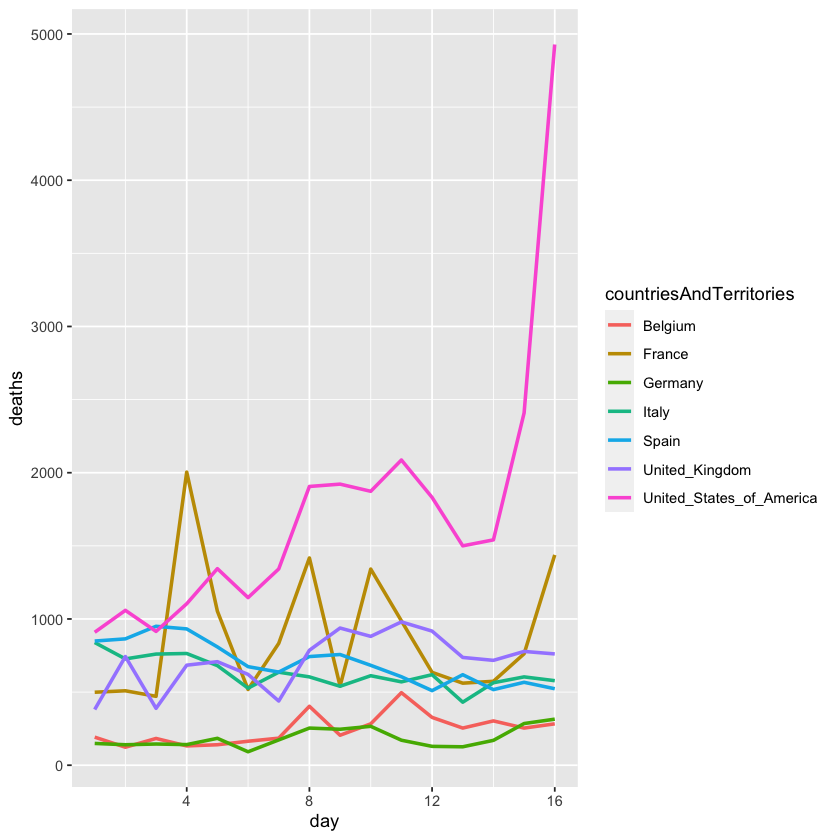

In [16]:
#Basic graph
ggplot() +
  geom_line(data = badcases, aes(x=day , y = deaths, color = countriesAndTerritories), size = 1)

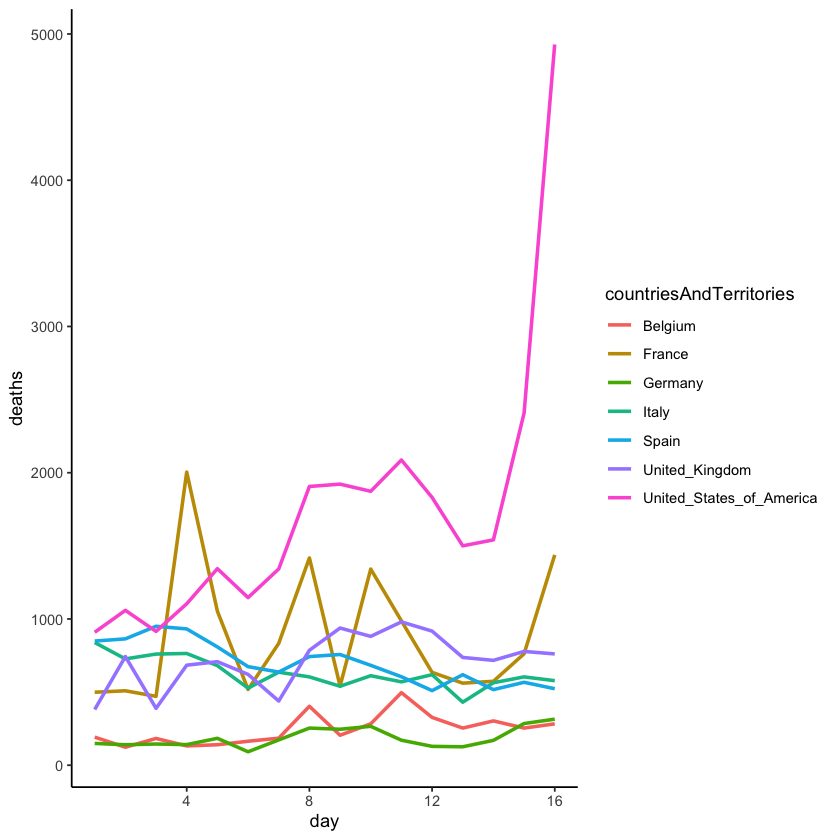

In [17]:

#Remove clutter
ggplot() +
  theme_classic()+
  geom_line(data = badcases, aes(x=day , y = deaths, color = countriesAndTerritories), size = 1)

##### Improve readability
Here, we 
 - widen the plot, so it's easier to read
 - rename the variables to make the legend easier to read
 - change the ticks and label on the x-axis
 - change the ticks and label on the y-axis

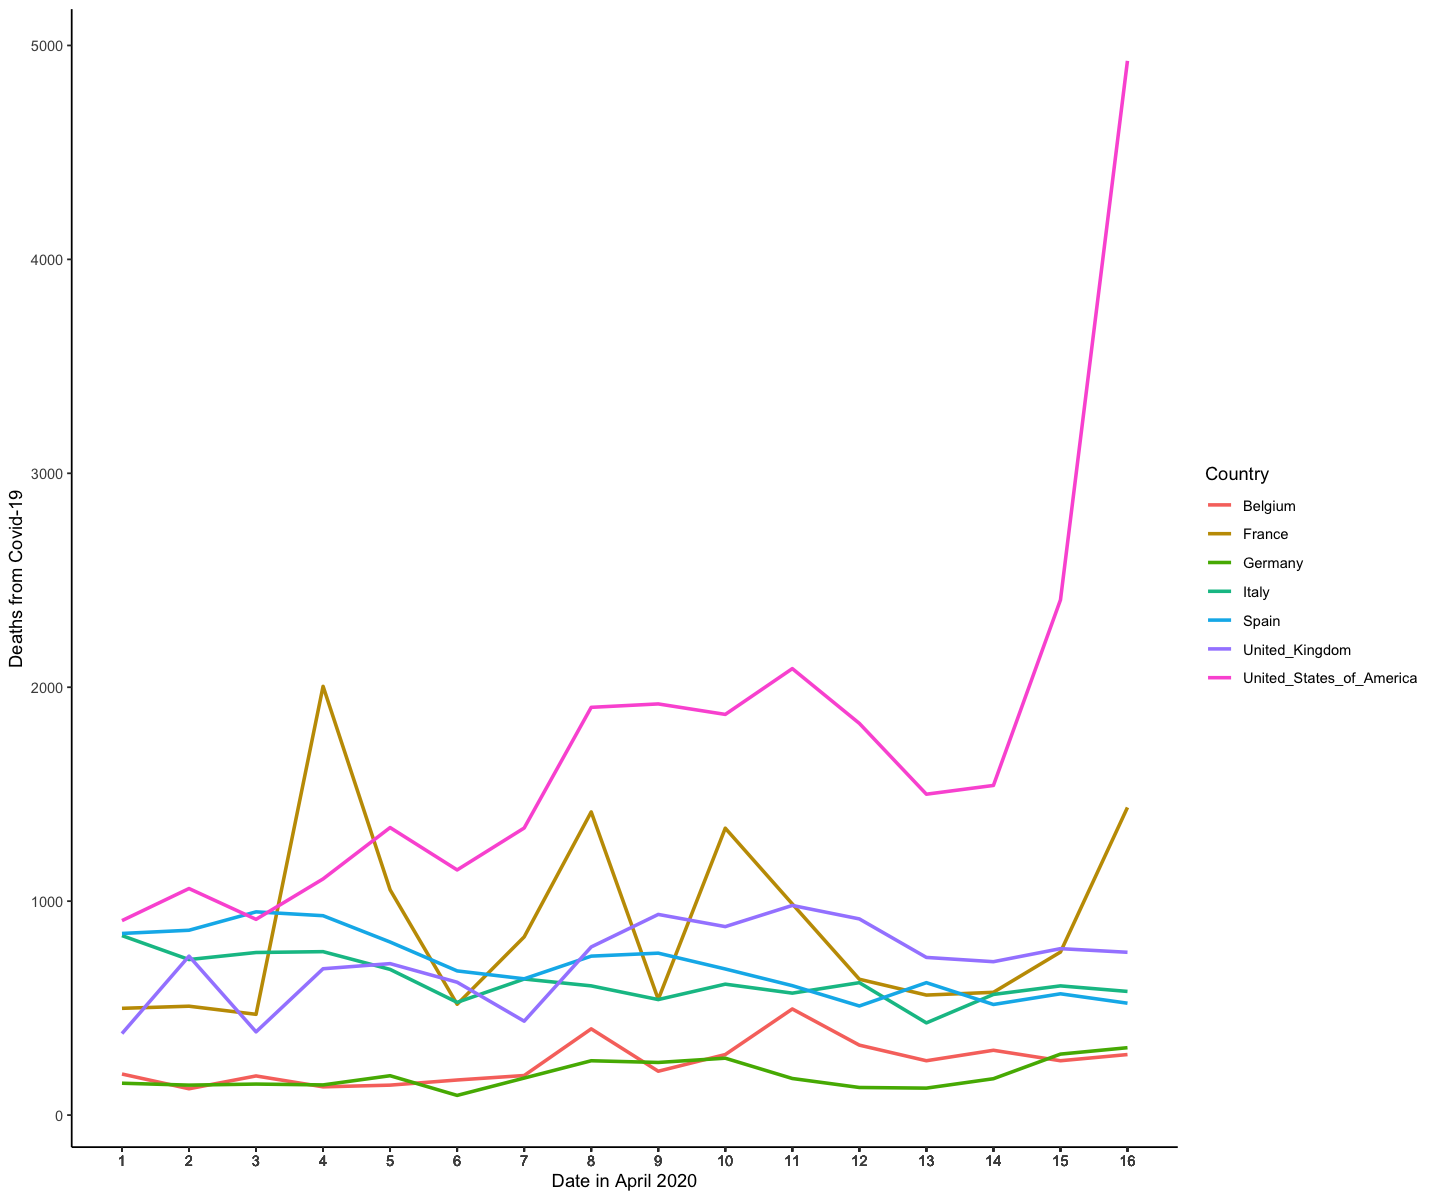

In [24]:
options(repr.plot.width=12,repr.plot.height=10)
names(badcases) <- c('day','Country','Deaths')
ggplot() +
  theme_classic()+
  geom_line(data = badcases, aes(x=day , y = Deaths, color = Country), size = 1)+
  scale_y_continuous("Deaths from Covid-19", breaks=seq(0,5000,1000))+
  scale_x_continuous("Date in April 2020", labels = as.character(badcases$day), breaks = badcases$day)

  day                  Country Deaths
1  16 United_States_of_America   4928


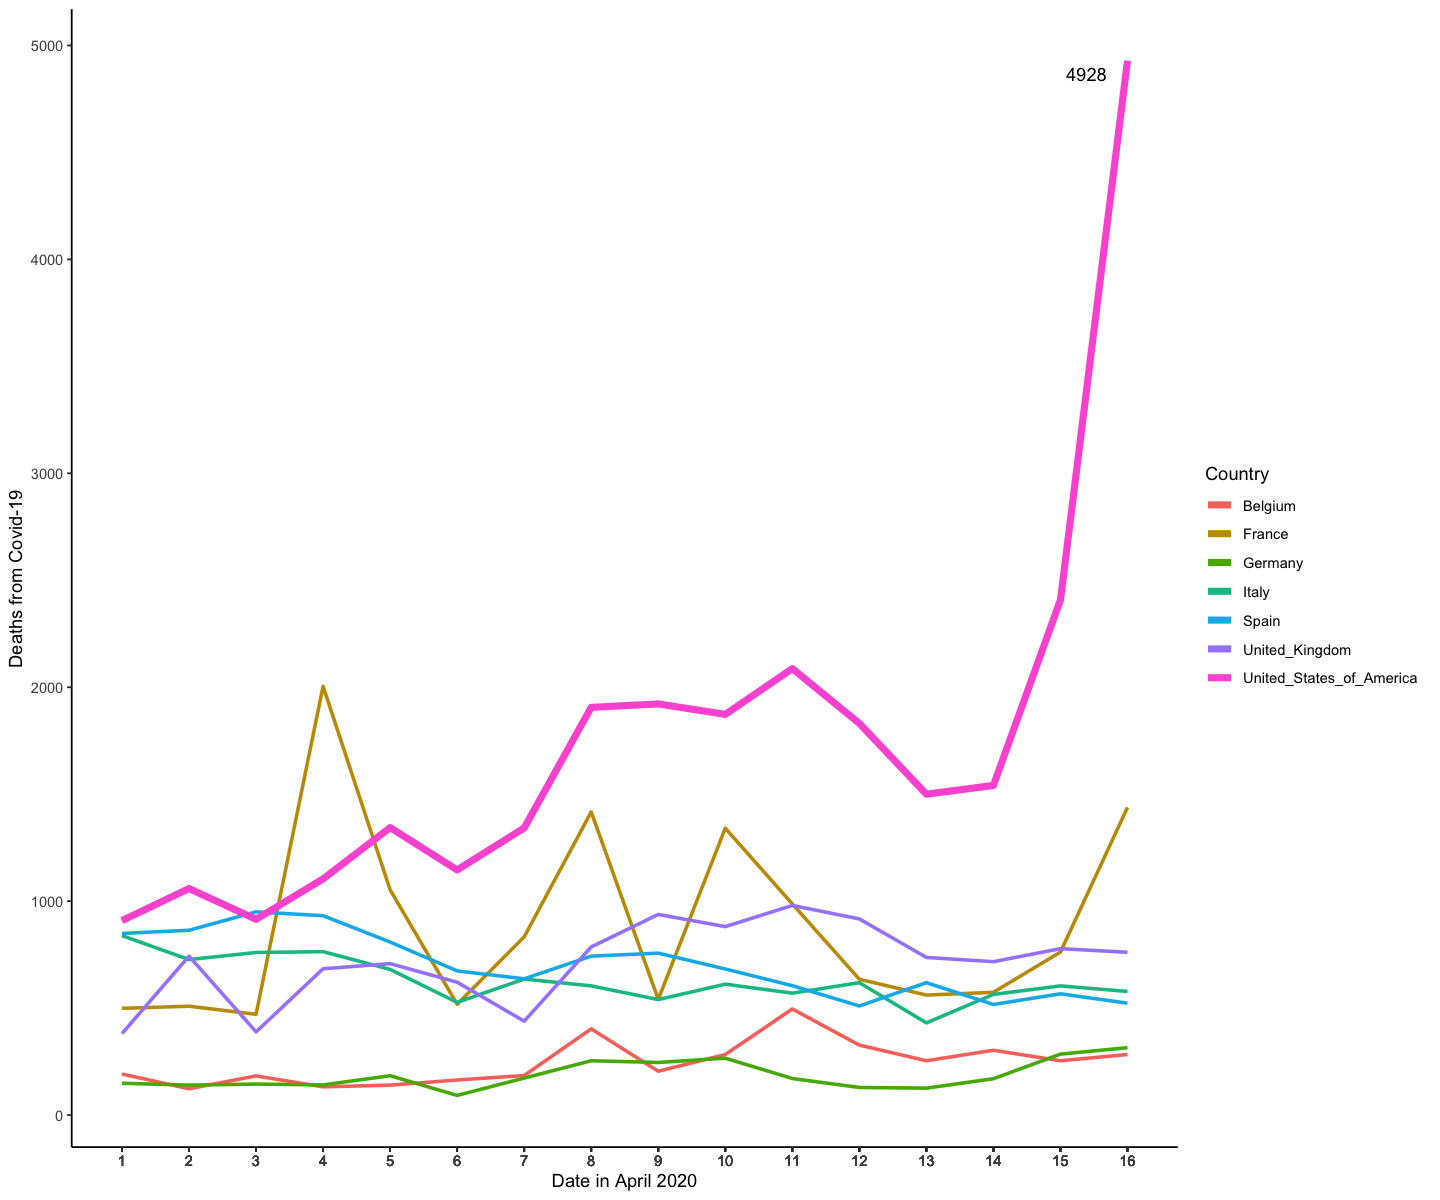

In [50]:
#Highlight the most startling statistic

maxpoint = sqldf("select * from badcases 
                 where Deaths in 
                  (select max(Deaths) from badcases)")

options(repr.plot.width=12,repr.plot.height=10)
names(badcases) <- c('day','Country','Deaths')
ggplot() +
  theme_classic()+
  geom_line(data = badcases, aes(x=day , y = Deaths, color = Country), size = 1)+
  geom_line(data = americancases, aes(x=day , y = Deaths, color = Country), size = 2)+
  geom_text(data=maxpoint, mapping=aes(x=day, y=Deaths), label=maxpoint$Deaths, vjust=1.5, hjust=1.5) +
  scale_y_continuous("Deaths from Covid-19", breaks=seq(0,6000,1000))+
  scale_x_continuous("Date in April 2020", labels = as.character(badcases$day), breaks = badcases$day)

### Data requiring 'melt'

If we are trying to plot different values from the same observation, we need to reshape them.  Consider a situation where we want to plot cases and deaths on the same graph.  First, let's look at the daily cases and deaths in Italy.

In [61]:
#Now get the observations from those countries in 
italcases = sqldf("select day,   cases, deaths 
                    from data 
                    where  month==4 and countriesAndTerritories='Italy'")
head(italcases)
str(italcases)


,day,cases,deaths
,<int>,<int>,<int>
1,16,2667,578
2,15,2972,604
3,14,3153,564
4,13,4092,431
5,12,4694,619
6,11,3951,570


'data.frame':	16 obs. of  3 variables:
 $ day   : int  16 15 14 13 12 11 10 9 8 7 ...
 $ cases : int  2667 2972 3153 4092 4694 3951 4204 3836 3039 3599 ...
 $ deaths: int  578 604 564 431 619 570 612 540 604 636 ...


ggplot needs each variable to be on a different observation.  Fortunately the 'melt' function reshapes it for us:

In [69]:
chart_data = melt(italcases,'day')
head(chart_data)
str(chart_data)

,day,variable,value
,<int>,<fct>,<int>
1,16,cases,2667
2,15,cases,2972
3,14,cases,3153
4,13,cases,4092
5,12,cases,4694
6,11,cases,3951


'data.frame':	32 obs. of  3 variables:
 $ day     : int  16 15 14 13 12 11 10 9 8 7 ...
 $ variable: Factor w/ 2 levels "cases","deaths": 1 1 1 1 1 1 1 1 1 1 ...
 $ value   : int  2667 2972 3153 4092 4694 3951 4204 3836 3039 3599 ...


Melt has converted the 16 observations into 32, putting one mappable value into each observation and adding a label to say which column it came from, so the first observation from above becomes two, one with a variable labelled 'cases' and the other with a variable labelled 'deaths.'  Let's plot those, noting that the column 'day' retained its name. 'variable' now holds either 'deaths' or 'cases' and the remaining attribute is the value.  If we generate a plot as is, it'll work, but it won't look great.

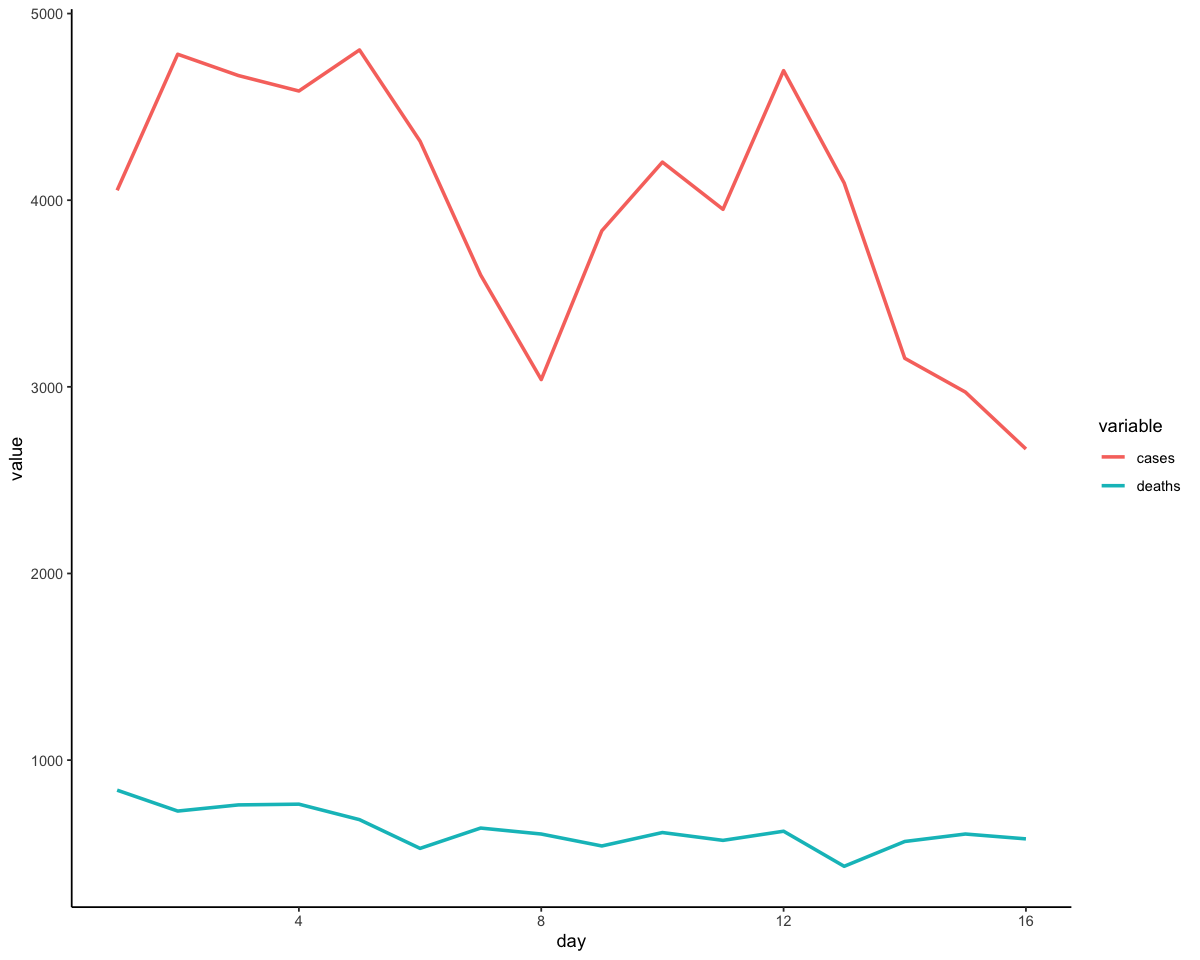

In [71]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot() +
  theme_classic()+
  geom_line(data = chart_data, aes(x=day , y = value, color = variable), size = 1)


Normally, we rename the data headers to make it more readable.

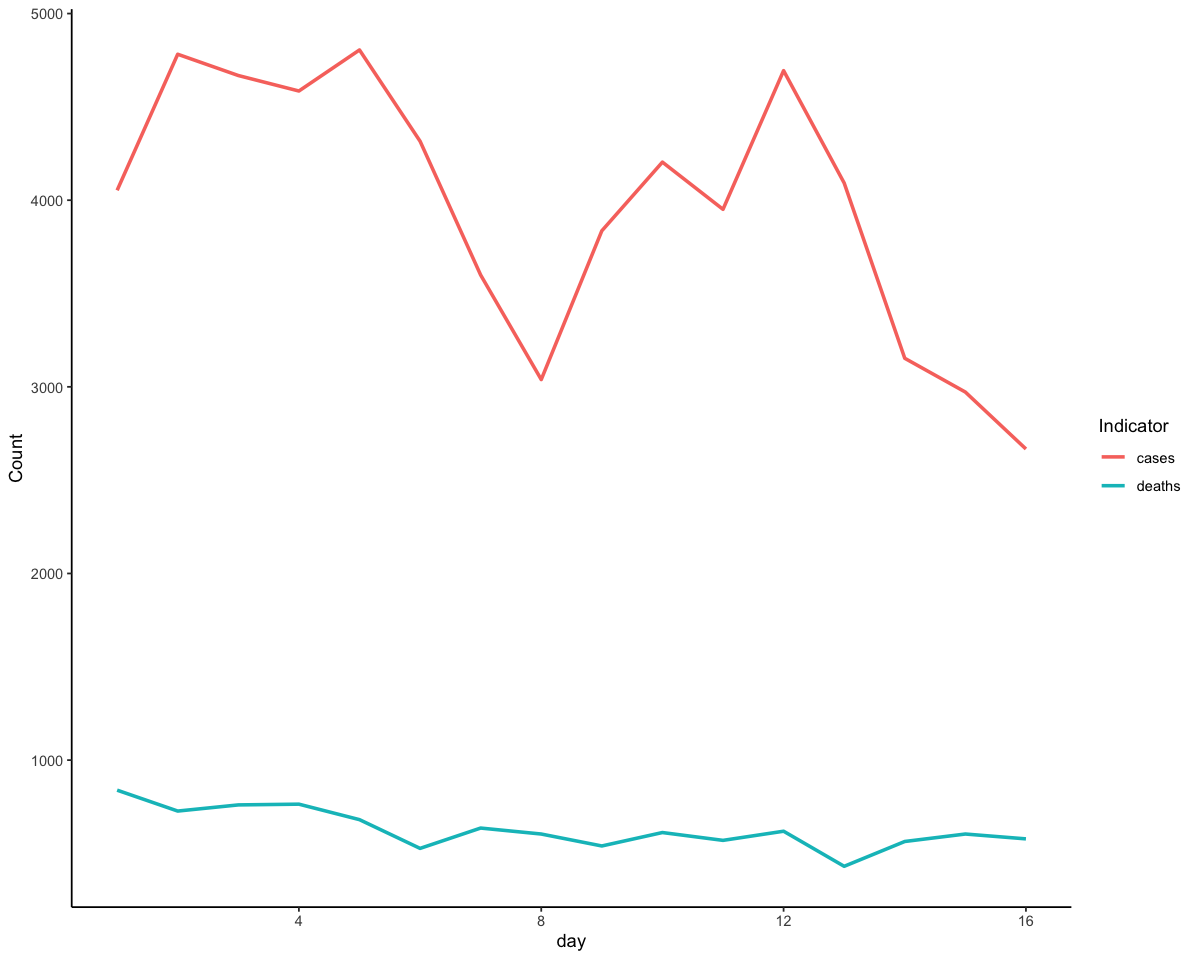

In [75]:
names(chart_data) <- c('day', 'Indicator', 'Count')
ggplot() +
   theme_classic()+
   geom_line(data = chart_data, aes(x=day , y = Count, color = Indicator), size = 1)
